In [1]:
## 依赖引入
from __future__ import print_function
import numpy as np
from mnist.loader import MNIST
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from tensorflow.keras import optimizers
from matplotlib import pyplot as plt

In [2]:
# 一次训练抓取的样本数量
batch_size = 128
# 我们的训练数据的类别
num_classes = 10
# 迭代的次数
epochs = 30
# 我们输入的图片的大小，图片都是28*28的像素
img_rows, img_cols = 28, 28

我们的类别如下
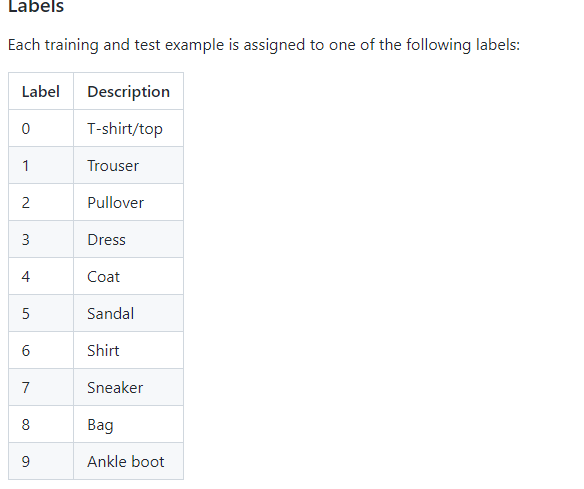

In [3]:
label_map={
    0: 'T恤（顶部）',
    1: '裤子',
    2: '套衫',
    3: '裙子',
    4: '外套',
    5: '凉鞋',
    6: '衬衫',
    7: '运动鞋',
    8: '背包',
    9: '高跟鞋'
}

In [4]:
# 下面我们加载一下数据集合训练集，这里我们使用的是mnist数据集
mndata = MNIST(path='data/', )
# 获取一下训练集和测试集
x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()
# 然后我们还需要转换为

In [5]:
# 这里我们打印一下训练集合数据集的大小
print(len(x_train))
print(len(x_test))

60000
10000


In [6]:
# 随便找一条训练集以及标签
print(x_train[0])
print(y_train[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
# 下面我们转换为numpy的数组形式，因为后面训练和计算都是基于numpy数组的形式
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
# 可以看到，我们这个数组是60000个，然后里面就是28*28 = 784 
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
# 下面我们改变数组的形状，转换为三维数组
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


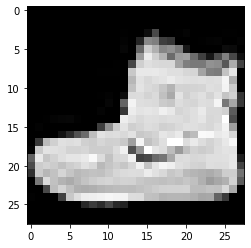

In [12]:
# 下面我们来打印一下图片
plt.imshow(x_train[0], cmap='gray')
plt.show()

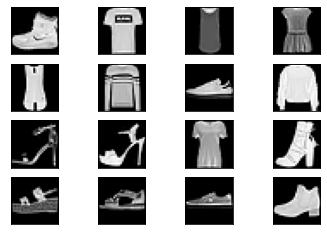

In [13]:
# 也可以打印多张图片
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(x_train[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [14]:
for i in range(1,17):
    print(label_map[y_train[i-1]])

高跟鞋
T恤（顶部）
T恤（顶部）
裙子
T恤（顶部）
套衫
运动鞋
套衫
凉鞋
凉鞋
T恤（顶部）
高跟鞋
凉鞋
凉鞋
运动鞋
高跟鞋


In [15]:
# 为了方便模型使用我们需要把图片的255灰度转换到0-1之间
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
# 把数组打散到大小为10的数组中
print(y_train.shape)
print(y_train[0])
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[0])

(60000,)
9
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [17]:
# 构建我们的模型
#  序贯模型是函数式模型的简略版，为最简单的线性、从头到尾的结构顺序，不分叉，是多个网络层的线性堆叠。
model = Sequential()
# Conv2D是卷积层，第一个参数是过滤器的个数，也就是卷积核的个数
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D是一个池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
# 随机删除部分神经网络
model.add(Dropout(0.25))
# 压平操作，一般用于卷积层到全连接层的过度
model.add(Flatten())
# 全链接层
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# 方法用于在配置训练方法时，告知训练时用的优化器、损失函数和准确率评测标准
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])
# optimizer = 优化器， 优化器的选择在深度学习训练中有着极其重要的作用，关系这训练能否快速收敛并取得较高的准确率和召回率
# loss = 损失函数， 衡量模型模型预测的好坏
# metrics = ["准确率”]

2021-12-27 02:34:30.639826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 02:34:30.723840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 02:34:30.724286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 02:34:30.725954: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [18]:
# 显示模型的结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [19]:
# 下面我们正式开始训练，输入我们的训练集合测试集，batch_size和迭代次数
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
# 6000/128 = 468.75
# verbose = 1 为输出进度条记录
# validation_data验证数据

Epoch 1/30


2021-12-27 02:35:29.540867: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100
2021-12-27 02:35:33.021662: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


469/469 [==============================] - 9s 7ms/step - loss: 0.5303 - accuracy: 0.8156 - val_loss: 0.3290 - val_accuracy: 0.8819
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3426 - accuracy: 0.8777 - val_loss: 0.2916 - val_accuracy: 0.8950
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2953 - accuracy: 0.8949 - val_loss: 0.2591 - val_accuracy: 0.9019
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2647 - accuracy: 0.9050 - val_loss: 0.2561 - val_accuracy: 0.9074
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2395 - accuracy: 0.9135 - val_loss: 0.2421 - val_accuracy: 0.9127
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2182 - accuracy: 0.9194 - val_loss: 0.2321 - val_accuracy: 0.9165
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2032 - accuracy: 0.9254 - val_loss: 0.2164 - val_accuracy: 0.9209
Epoch 8/30
469/46

In [20]:
# 下面我们使用测试数据来评估一下模型的准确率
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25443416833877563
Test accuracy: 0.932699978351593


In [21]:
# 保存我们的模型
model.save('./cnn_model')

2021-12-27 02:37:31.855627: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./cnn_model/assets


In [24]:
# 加载模型
new_model = keras.models.load_model('./cnn_model')
new_model.summary()
score = new_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

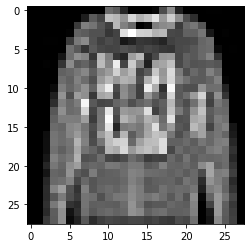

In [25]:
# 下面我们来打印一下图片
plt.imshow(x_test[500], cmap='gray')
plt.show()

In [26]:
mndata = MNIST(path='data/', )
x_test, y_test = mndata.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)

In [27]:
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

In [28]:
res = model.predict(x_test[500])
print(res)
print(res.argmax(1)[0])
print(label_map[res.argmax(1)[0]])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2
套衫


In [29]:
print(y_test[500])

2
